## # Introduction
<p><img src="https://assets.datacamp.com/production/project_1010/img/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"></p>
<h3 id="flyawaywithpeterpan">Fly away with Peter Pan!</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? </p>
<p>You're going to explore and analyze Peter Pan's text to answer the question in the instruction pane below. You are working with the text version available here at <a href="https://www.gutenberg.org/files/16/16-h/16-h.htm">Project Gutenberg</a>. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. <a href="https://www.datacamp.com/courses/intermediate-importing-data-in-python">Intermediate Importing Data in Python</a> and <a href="https://www.datacamp.com/courses/introduction-to-natural-language-processing-in-python">Introduction to Natural Language Processing in Python</a> teach the skills required to complete this project. Should you decide to use them, English stopwords have been downloaded from <code>nltk</code> and are available for you in your environment.</p>

In [15]:
# Use this cell to begin your analysis, and add as many as you would like!
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter

In [16]:
r = requests.get("https://www.gutenberg.org/files/16/16-h/16-h.htm")
r.encoding = "utf-8"
html = r.text
#print(html[:2000])

In [20]:
soup = BeautifulSoup(html)
text = soup.text
#print(text[:2000])

In [21]:
trimmed_text = text[2583:]
#print(trimmed_text[:1000])

In [22]:
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")
tokens = tokenizer.tokenize(trimmed_text)
print(tokens[:10])

['Chapter', '1', 'PETER', 'BREAKS', 'THROUGH', 'All', 'children', 'except', 'one', 'grow']


In [23]:
words =[token.lower() for token in tokens]
#print(words[:5])

In [24]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
#print(stop_words[:5])

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
words_clean = [word for word in words if word not in stop_words]
#print(words_clean[:10])

In [26]:
count = Counter(words_clean)
top_ten = count.most_common(10)
print(top_ten)

[('peter', 402), ('wendy', 358), ('said', 358), ('would', 219), ('one', 214), ('hook', 174), ('could', 142), ('cried', 136), ('john', 133), ('time', 125)]


In [10]:
protagonists = ["peter", "wendy", "hook","john"]

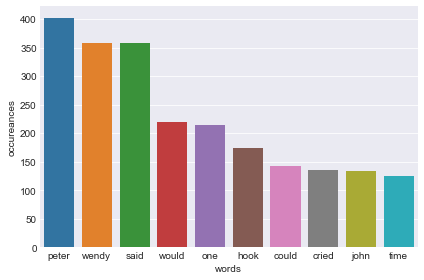

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.DataFrame(top_ten, columns = ["words", 'occureances'])
sns.set_style("darkgrid")
sns.barplot(x='words', y='occureances', data= df)
plt.show()